In [1]:
2 * 3

6

In [2]:
print("hello world")

hello world


In [3]:
x = 10
print(x)
print(x+5)

y = x + 7
print(y)

z = 0
print(z)

10
15
17
0


In [4]:
list(range(10))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [5]:
for n in range(10):
    print(n)
    pass
print("done")

0
1
2
3
4
5
6
7
8
9
done


In [6]:
for n in range(10):
    print(n, "squared is", n*n)
    pass
print("done")

0 squared is 0
1 squared is 1
2 squared is 4
3 squared is 9
4 squared is 16
5 squared is 25
6 squared is 36
7 squared is 49
8 squared is 64
9 squared is 81
done


In [7]:
# the following prints out 2 cubed
print(2**3)

8


In [8]:
def avg(x, y):
    print("first inp: ", x)
    print("second inp: ", y)
    a = (x + y) / 2.0
    print("avg: ", a)
    return a

In [9]:
avg(2, 4)

first inp:  2
second inp:  4
avg:  3.0


3.0

In [10]:
avg(200, 301)

first inp:  200
second inp:  301
avg:  250.5


250.5

In [11]:
import numpy
import scipy.special

In [12]:
a = numpy.zeros([3,2])
print(a)

[[0. 0.]
 [0. 0.]
 [0. 0.]]


In [13]:
a[0, 0] = 1
a[0, 1] = 2
a[1, 0] = 9
a[2, 1] = 12
print(a)


[[ 1.  2.]
 [ 9.  0.]
 [ 0. 12.]]


In [14]:
print(a[0, 1])
v = a[1, 0]
print(v)

2.0
9.0


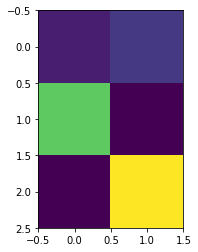

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(a, interpolation="nearest")

In [16]:
class Dog:
    def bark(self):
        print("woof")
        pass
    pass

In [17]:
s = Dog()

In [18]:
s.bark()

woof


In [19]:
a = Dog()
b = Dog()

a.bark()
b.bark()

woof
woof


In [20]:
class Dog:
    
    def __init__(self, petname, temp):
        self.name = petname
        self.temp = temp
        
    def status(self):
        print("name is", self.name)
        print("temperature is", self.temp)
        pass
    
    def setTemperature(self, newTemp):
        self.temp = newTemp
        pass
    
    def bark(self):
        print("woof")
        pass
    
    pass

In [21]:
lassie = Dog("lassie", 37)

In [22]:
lassie.status()

name is lassie
temperature is 37


In [23]:
lassie.setTemperature(40)
lassie.status()

name is lassie
temperature is 40


In [24]:
class neuralNetwork:
    
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
        self.lr = learningrate
        self.wih = numpy.random.normal(0.0, pow(self.inodes, -0.5), (self.hnodes, self.inodes))
        self.who = numpy.random.normal(0.0, pow(self.hnodes, -0.5), (self.onodes, self.hnodes))
        self.activation_function = lambda x:scipy.special.expit(x)
        self.inverse_activation_function = lambda x: scipy.special.logit(x)
        pass
    
    def train(self, inputs_list, targets_list):
        inputs = numpy.array(inputs_list, ndmin=2).T
        targets = numpy.array(targets_list, ndmin=2).T
        
        hidden_inputs = numpy.dot(self.wih, inputs)
        hidden_outputs = self.activation_function(hidden_inputs)
        
        final_inputs = numpy.dot(self.who, hidden_outputs)
        final_outputs = self.activation_function(final_inputs)
        
        output_errors = targets - final_outputs
        hidden_errors = numpy.dot(self.who.T, output_errors)
        self.who += self.lr * numpy.dot((output_errors * final_outputs * (1.0 - final_outputs)), numpy.transpose(hidden_outputs))

        self.wih += self.lr * numpy.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), numpy.transpose(inputs))
        pass
        
    def query(self, inputs_list):
        inputs = numpy.array(inputs_list, ndmin=2).T
        hidden_inputs = numpy.dot(self.wih, inputs)
        hidden_outputs = self.activation_function(hidden_inputs)
        final_inputs = numpy.dot(self.who, hidden_outputs)
        final_outputs = self.activation_function(final_inputs)
        return final_outputs

    def backquery(self, targets_list):
        final_outputs = numpy.array(targets_list, ndmin=2).T

        final_inputs = self.inverse_activation_function(final_outputs)

        hidden_outputs = numpy.dot(self.who.T, final_inputs)
        hidden_outputs -= numpy.min(hidden_outputs)
        hidden_outputs /= numpy.max(hidden_outputs)
        hidden_outputs *= 0.98
        hidden_outputs += 0.01

        hidden_inputs = self.inverse_activation_function(hidden_outputs)

        inputs = numpy.dot(self.wih.T, hidden_inputs)
        inputs -= numpy.min(inputs)
        inputs /= numpy.max(inputs)
        inputs *= 0.98
        inputs += 0.01

        return inputs
    
    pass

In [25]:
n = neuralNetwork(3, 3, 3, 0.3)

In [26]:
numpy.random.rand(3, 3)

array([[0.7246394 , 0.8124839 , 0.1207131 ],
       [0.77474409, 0.8250756 , 0.25408315],
       [0.24240576, 0.90119677, 0.62077775]])

In [27]:
numpy.random.rand(3, 3) - 0.5

array([[-0.02584347,  0.33366786, -0.15480003],
       [-0.02618428, -0.12080932,  0.46299863],
       [-0.40067721, -0.24031879, -0.39587016]])

In [28]:
n.query([1.0, 0.5, -1.5])

array([[0.38869705],
       [0.48771436],
       [0.24583869]])

In [29]:
data_file = open("mnist_dataset/mnist_train_100.csv", 'r')
data_list = data_file.readlines()
data_file.close()

In [30]:
len(data_list)

100

In [31]:
data_list[0]

'5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,18,18,18,126,136,175,26,166,255,247,127,0,0,0,0,0,0,0,0,0,0,0,0,30,36,94,154,170,253,253,253,253,253,225,172,253,242,195,64,0,0,0,0,0,0,0,0,0,0,0,49,238,253,253,253,253,253,253,253,253,251,93,82,82,56,39,0,0,0,0,0,0,0,0,0,0,0,0,18,219,253,253,253,253,253,198,182,247,241,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,80,156,107,253,253,205,11,0,43,154,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14,1,154,253,90,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,139,253,190,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,190,253,70,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35,241,225,160,108,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,81,240,253,253,119,25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

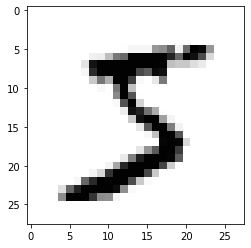

In [32]:
all_values = data_list[0].split(',')
image_array = numpy.asfarray(all_values[1:]).reshape((28,28))
plt.imshow(image_array, cmap='Greys', interpolation='None')

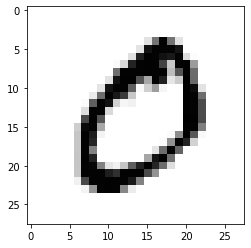

In [33]:
all_values = data_list[1].split(',')
image_array = numpy.asfarray(all_values[1:]).reshape((28,28))
plt.imshow(image_array, cmap='Greys', interpolation='None')

In [34]:
scaled_input = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
print(scaled_input)

[0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0

In [35]:
onodes = 10
targets = numpy.zeros(onodes) + 0.01
targets[int(all_values[0])] = 0.99

In [36]:
print(targets)

[0.99 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]


In [37]:
input_nodes = 784
hidden_nodes = 200
output_nodes = 10
learning_rate = 0.1

n = neuralNetwork(input_nodes,hidden_nodes,output_nodes, learning_rate)

In [38]:
training_data_file = open("mnist_dataset/mnist_train.csv", 'r')
training_data_list = training_data_file.readlines()
training_data_file.close()

In [39]:
epochs = 1
for e in range(epochs):
    for record in training_data_list:
            all_values = record.split(',')
            inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
            targets = numpy.zeros(output_nodes) + 0.01
            targets[int(all_values[0])] = 0.99
            n.train(inputs, targets)
            pass
pass

In [40]:
test_data_file = open("mnist_dataset/mnist_test.csv", 'r')
test_data_list = test_data_file.readlines()
test_data_file.close()

In [41]:
all_values = test_data_list[0].split(',')
print(all_values[0])

7


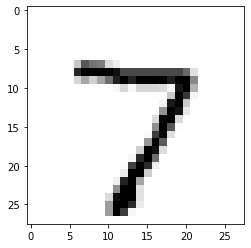

In [42]:
image_array = numpy.asfarray(all_values[1:]).reshape((28,28))
plt.imshow(image_array, cmap='Greys', interpolation='None')

In [43]:
n.query((numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01)

array([[0.01002532],
       [0.01798343],
       [0.00905188],
       [0.00630343],
       [0.00221483],
       [0.00407365],
       [0.0038657 ],
       [0.99553843],
       [0.00767921],
       [0.00725275]])

In [44]:
scorecard = []

for record in test_data_list:
    all_values = record.split(',')
    correct_label = int(all_values[0])
    inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
    outputs = n.query(inputs)
    label = numpy.argmax(outputs)
    if (label == correct_label):
        scorecard.append(1)
    else:
        scorecard.append(0)
        pass
    
pass

In [45]:
print(scorecard)

[1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [46]:
scorecard_array = numpy.asarray(scorecard)
print("performance = ", scorecard_array.sum() / scorecard_array.size)

performance =  0.9566


In [47]:
# learning rate = 0.3, hidden nodes = 100, 1 epoch -> 0.9427

In [48]:
# following vals all from 1 epoch at 200 hidden nodes:
# learning rate = 0.3 -> 0.9522
# set learning rate = 0.6 -> 0.9345
# set learning rate = 0.1 -> 0.9553
# set learning rate = 0.01 -> 0.9058
# set learning rate = 0.2 -> 0.9599 ... best performance (on 1 epoch)

In [49]:
# learning rate = 0.1, epochs = 7, hidden nodes = 200 -> 0.9733

In [50]:
# learning rate = 0.1, epochs = 7, hidden nodes = 500 ... optimal network from book -> 0.9784

In [51]:
import imageio # new versions of scipy don't have `imread()`
import glob

In [52]:
dataset = []

loading ... 2828_my_own_image.png
min =  0.01
max =  1.0
[[4.18215701e-05]
 [1.15773744e-03]
 [1.65416605e-03]
 [9.95052742e-01]
 [1.93637211e-04]
 [5.39962105e-04]
 [1.38108547e-03]
 [5.21109436e-03]
 [8.57779448e-04]
 [9.20420765e-03]]
network says 3


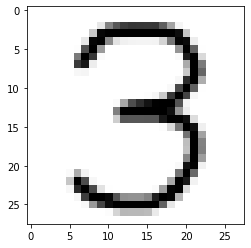

In [53]:
print ("loading ... 2828_my_own_image.png")
img_array = imageio.imread('ps0_drawings/2828_my_own_image.png', as_gray=True)
img_data  = 255.0 - img_array.reshape(784)

img_data = (img_data / 255.0 * 0.99) + 0.01
print("min = ", numpy.min(img_data))
print("max = ", numpy.max(img_data))

plt.imshow(img_data.reshape(28,28), cmap='Greys', interpolation='None')
outputs = n.query(img_data)
print (outputs)

label = numpy.argmax(outputs)
print("network says", label)

In [54]:
for image_file_name in glob.glob('my_own_images/2828_my_own_?.png'):
    print ("loading ... ", image_file_name)
    label = int(image_file_name[-5:-4])
    img_array = imageio.imread(image_file_name, as_gray=True)
    img_data  = 255.0 - img_array.reshape(784)
    img_data = (img_data / 255.0 * 0.99) + 0.01
    print(numpy.min(img_data))
    print(numpy.max(img_data))
    record = numpy.append(label,img_data)
    print(record)
    dataset.append(record)
    pass

[0.99 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]


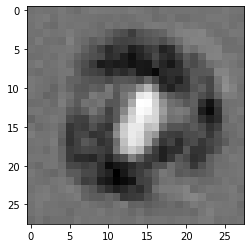

In [55]:
label = 0
targets = numpy.zeros(output_nodes) + 0.01
targets[label] = 0.99
print(targets)
image_data = n.backquery(targets)
plt.imshow(image_data.reshape(28,28), cmap='Greys', interpolation='None')

In [56]:
# i set epoch = 1 and hidden nodes = 200 for testing
print()